# **Virat Kohli Performance Analysis using Python**

Virat Kohli is the most famous cricketer in the world.Here is a dataset of all the ODI matches played by Virat Kohli from 18 August 2008 to 22 January 2017.



Below is the complete information about all the columns in the dataset:

1. Runs: Runs in the match
2. BF: Balls faced in the match
3. 4s: number of 4s in a match
4. 6s: number of 6s in a match
5. SR: Strike Rate in the match
6. Pos: Batting Position in the match
7. Dismissal: How Virat Kohli got out in the match
8. Inns: 1st and 2nd innings
9. Opposition: Who was the opponent of India
10. Ground: Venue of the match
11. Start Date: Date of the match

You can Download the DataSet from the link. [Download DataSet](https://drive.google.com/file/d/1Gk8DWtNw1BOvNz5c_KWhbcdz9oEfFTHm/view?usp=sharing)


Now i start analysing the performance of Virat Kohli in the ODI matches using Python and its Libraries.

Firstly, importing necessary libraries of Python

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Now importing DataSet...

In [5]:
data = pd.read_csv("/content/drive/MyDrive/Data-Analysis/Projects/DataSets/ViratKholi.csv")
data.head()

,Runs,BF,4s,6s,SR,Pos,Dismissal,Inns,Opposition,Ground,Start Date
0,12,22,1,0,54.54,2.0,lbw,1,v Sri Lanka,Dambulla,18-Aug-08
1,37,67,6,0,55.22,2.0,caught,2,v Sri Lanka,Dambulla,20-Aug-08
2,25,38,4,0,65.78,1.0,run out,1,v Sri Lanka,Colombo (RPS),24-Aug-08
3,54,66,7,0,81.81,1.0,bowled,1,v Sri Lanka,Colombo (RPS),27-Aug-08
4,31,46,3,1,67.39,1.0,lbw,2,v Sri Lanka,Colombo (RPS),29-Aug-08


In [6]:
data.tail()

,Runs,BF,4s,6s,SR,Pos,Dismissal,Inns,Opposition,Ground,Start Date
127,45,51,2,1,88.23,3.0,caught,2,v New Zealand,Ranchi,26-Oct-16
128,65,76,2,1,85.52,3.0,caught,1,v New Zealand,Visakhapatnam,29-Oct-16
129,122,105,8,5,116.19,3.0,caught,2,v England,Pune,15-Jan-17
130,8,5,2,0,160.00,3.0,caught,1,v England,Cuttack,19-Jan-17
131,55,63,8,0,87.30,3.0,caught,2,v England,Kolkata,22-Jan-17


Before moving forward, Let's have a look at whether this DataSet contains any null values or not:

In [7]:
#Checking for null values:
null_values = data.isnull().sum()#.isnull() function check for the null values accross the column AND .sum() add the number of null values in the column.
print(null_values)

Runs          0
BF            0
4s            0
6s            0
SR            0
Pos           0
Dismissal     0
Inns          0
Opposition    0
Ground        0
Start Date    0
dtype: int64


*In this DataSet no Null value is Present*

Now, let's have a look at total runs scored by Virat Kohli

In [8]:
#Total runs scored from 18-Aug-2008 to 22-Jan-2017
total_runs = data['Runs'].sum()
print(data['Runs'].sum())

6184


Now, let's have a look at Batting average for the same period:

In [9]:
#Batting average of Virat Kohli from 18-Aug-2008 To 22-Jan-2017
avg = data['Runs'].mean()
print(data['Runs'].mean())

46.84848484848485


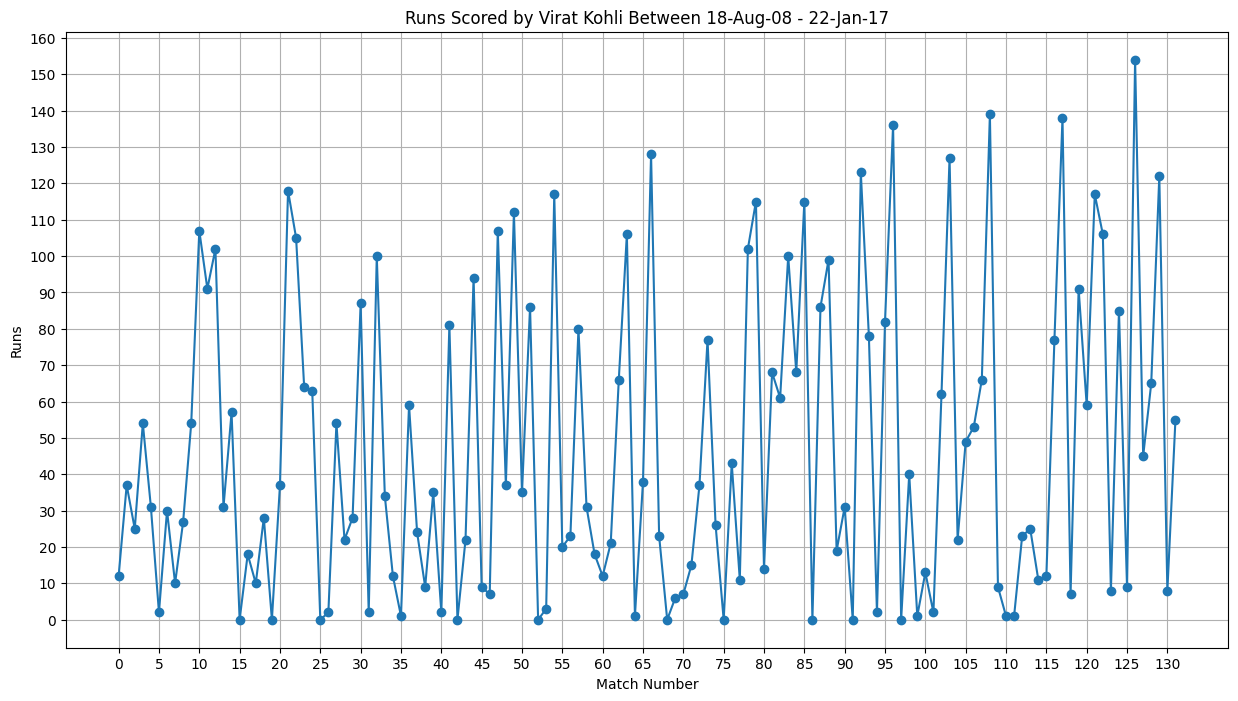

In [10]:
matches = data.index
plt.figure(figsize=(15,8))
plt.plot(matches, data["Runs"],marker='o')
plt.title('Runs Scored by Virat Kohli Between 18-Aug-08 - 22-Jan-17')
plt.xlabel("Match Number")
plt.ylabel("Runs")
plt.grid()
plt.xticks(np.arange(0,len(matches),5))
plt.yticks(np.arange(0,data['Runs'].max()+10,10))
plt.show()


In so many innings played by Virat Kohli, he scored over 100 or close to it. That is a good sign of consistency. Now let’s see all the batting positions played by Virat Kohli:

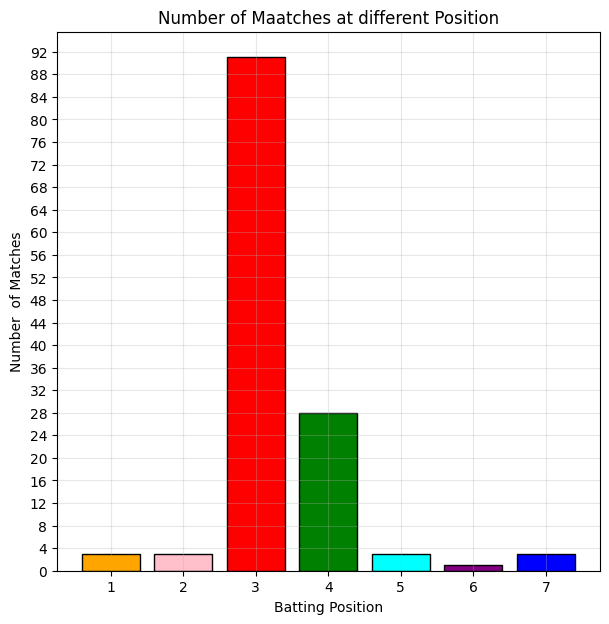

In [11]:
Pos = data['Pos'].value_counts()#this counts how many matches are played at which position.
labels = Pos.index
counts = Pos.values
colors = ['Red','Green','Pink','Blue','Orange','cyan','purple']

plt.figure(figsize=(7,7))
plt.bar(labels, counts, color=colors, edgecolor='Black')
plt.xlabel("Batting Position")
plt.ylabel("Number  of Matches")
plt.title("Number of Maatches at different Position")
plt.yticks(np.arange(0,max(counts)+4,4))
plt.grid(alpha=0.3)
plt.show()

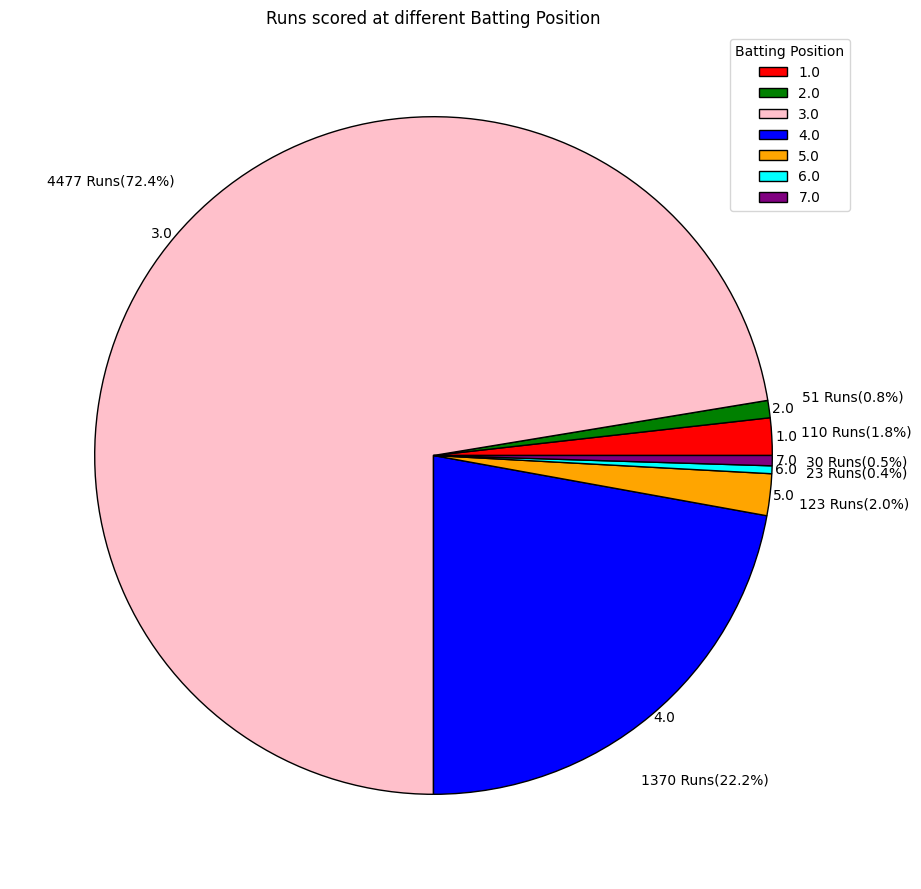

In [12]:
runs_on_pos = data.groupby("Pos")["Runs"].sum()#this group the dataset by position of Batting and add the runs scodred at each position.
labels = runs_on_pos.index
counts = runs_on_pos.values
colors = ['Red','Green','Pink','Blue','Orange','cyan','purple']
def func(pct, allvals):
    absolute = int(round(pct/100.*sum(allvals)))
    return "{:d} Runs({:.1f}%)".format(absolute, pct)
plt.figure(figsize=(11,11))
plt.pie(counts,labels=labels,colors=colors,autopct=lambda pct: func(pct,counts),wedgeprops={'edgecolor':'Black'},textprops={'fontsize':10},pctdistance=1.25,labeldistance=1.01)
plt.legend(labels, title="Batting Position", loc="upper right")
plt.title("Runs scored at different Batting Position")
plt.show()

More than 72% of the total runs scored by Virat Kohli are while batting at 3rd position. So we can say batting at 3rd position is perfect for Virat Kohli.

Now let’s have a look at the number of centuries scored by Virat Kohli while batting in the first innings and second innings:

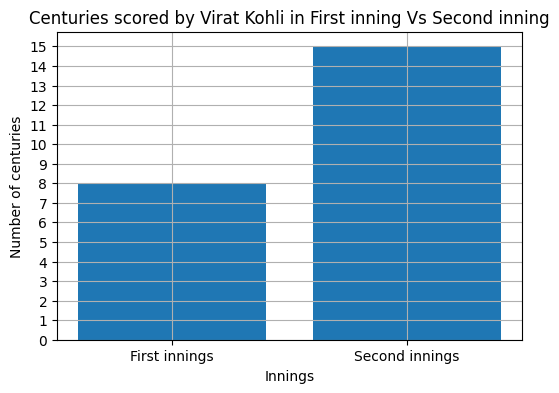

In [13]:
data['Runs'] = pd.to_numeric(data['Runs'])
centuries = data[data['Runs']>=100]
centuries_count = centuries['Inns'].value_counts().sort_index()
innings_labels = ["First innings","Second innings"]
counts = [centuries_count.get(1,0), centuries_count.get(2,0)]

plt.figure(figsize=(6,4))
plt.bar(innings_labels,counts)
plt.xlabel('Innings')
plt.ylabel('Number of centuries')
plt.title("Centuries scored by Virat Kohli in First inning Vs Second inning")
plt.grid()
plt.yticks(np.arange(0,16))
plt.show()

So most of the centuries are scored while batting in the second innings. By this, we can say that Virat Kohli likes chasing scores.

 Now let’s have a look at the kind of dismissals Virat Kohli faced most of the time:



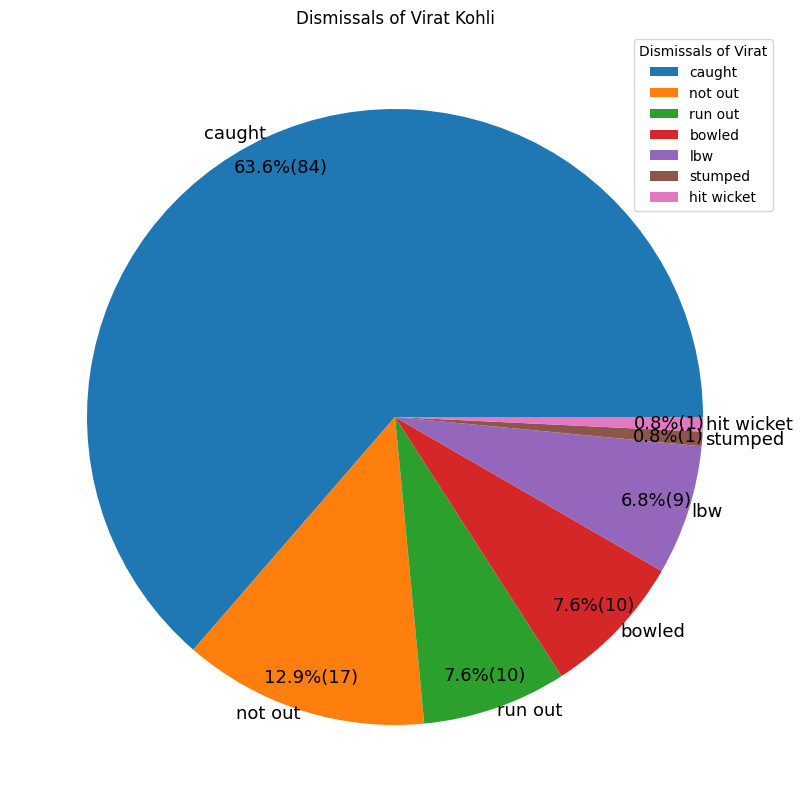

In [14]:
dism = data["Dismissal"].value_counts()
labels = dism.index
no_of_dismissal = dism.values
def no_of_dism(pct,allval):
    abs=int(round(pct/100*sum(allval)))
    return f"{pct:.1f}%({abs:d})"
plt.figure(figsize=(10,10))
plt.pie(no_of_dismissal,labels=labels,autopct=lambda pct: no_of_dism(pct,no_of_dismissal),textprops={'fontsize':13},labeldistance=1.01,pctdistance=.89)
plt.legend(labels,title="Dismissals of Virat",loc="upper right")
plt.title("Dismissals of Virat Kohli")
plt.show()

So most of the time, Virat Kohli gets out by getting caught by the fielder or the keeper.

Now let’s have a look at against which team Virat Kohli scored most of his runs:

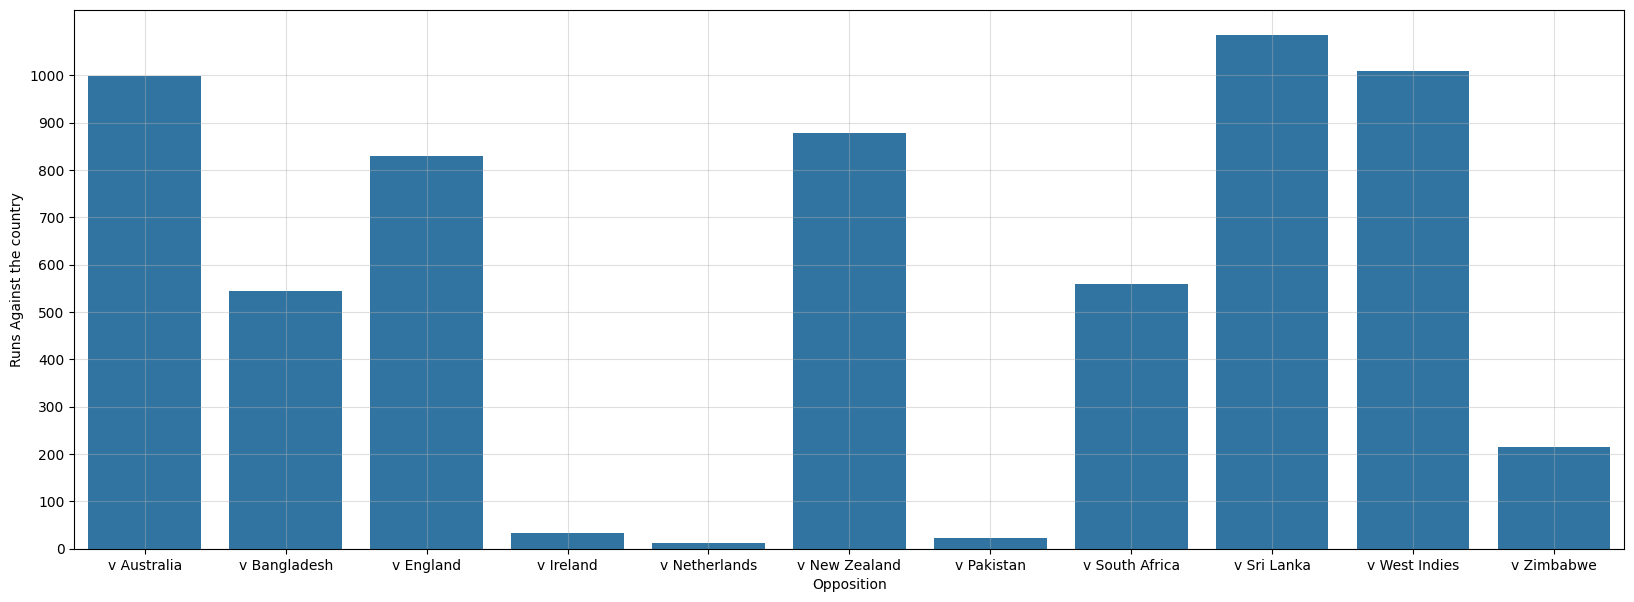

In [15]:
country = data.groupby("Opposition")["Runs"].sum()
labels = country.index
counts = country.values
plt.figure(figsize=(20,7))
sns.barplot(x=labels,y=counts)
plt.ylabel("Runs Against the country")
plt.grid(alpha=0.4)
plt.yticks(np.arange(0,1100,100))
plt.show()

According to the above figure, Virat Kohli likes batting against Sri Lanka, Australia, New Zealand, West Indies, and England. But he scored most of his runs while batting against Sri Lanka.

Now let’s have a look at against which team Virat Kohli scored most of his centuries:

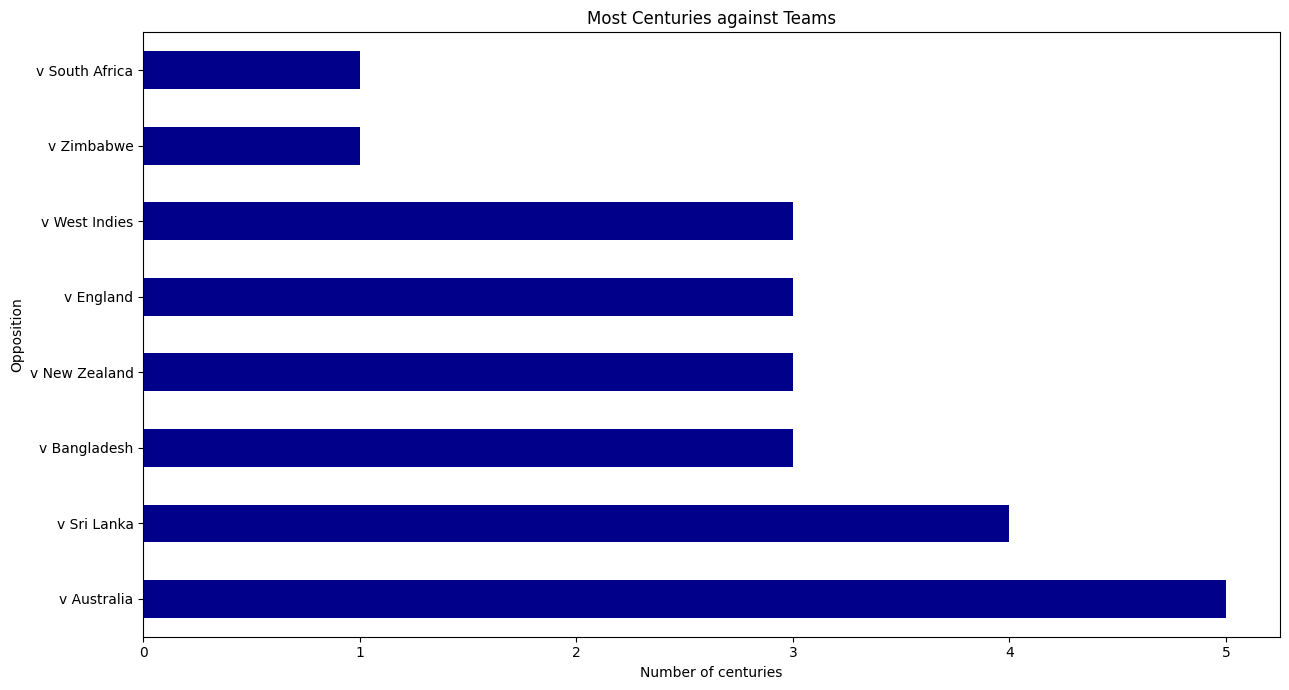

In [16]:
century = data[data["Runs"]>=100]
century_count = century['Opposition'].value_counts()
plt.figure(figsize=(13,7))
century_count.plot(kind='barh',color='darkblue')
plt.xlabel("Number of centuries")
plt.title("Most Centuries against Teams")
plt.tight_layout()
plt.show()

So, most of the centuries scored by Virat Kohli were against Australia.

In [17]:
strike_rate = data.query("SR>120")
strike_rate

,Runs,BF,4s,6s,SR,Pos,Dismissal,Inns,Opposition,Ground,Start Date
8,27,19,4,0,142.10,7.0,bowled,1,v Sri Lanka,Rajkot,15-Dec-09
32,100,83,8,2,120.48,4.0,not out,1,v Bangladesh,Dhaka,19-Feb-11
56,23,11,3,0,209.09,6.0,not out,1,v West Indies,Indore,8-Dec-11
76,43,34,4,1,126.47,3.0,caught,1,v England,Birmingham,23-Jun-13
78,102,83,13,2,122.89,3.0,caught,1,v West Indies,Port of Spain,5-Jul-13
83,100,52,8,7,192.30,3.0,not out,2,v Australia,Jaipur,16-Oct-13
85,115,66,18,1,174.24,3.0,not out,2,v Australia,Nagpur,30-Oct-13
130,8,5,2,0,160.00,3.0,caught,1,v England,Cuttack,19-Jan-17


Now let’s see the relationship between runs scored by Virat Kohli and fours played by him in each innings:



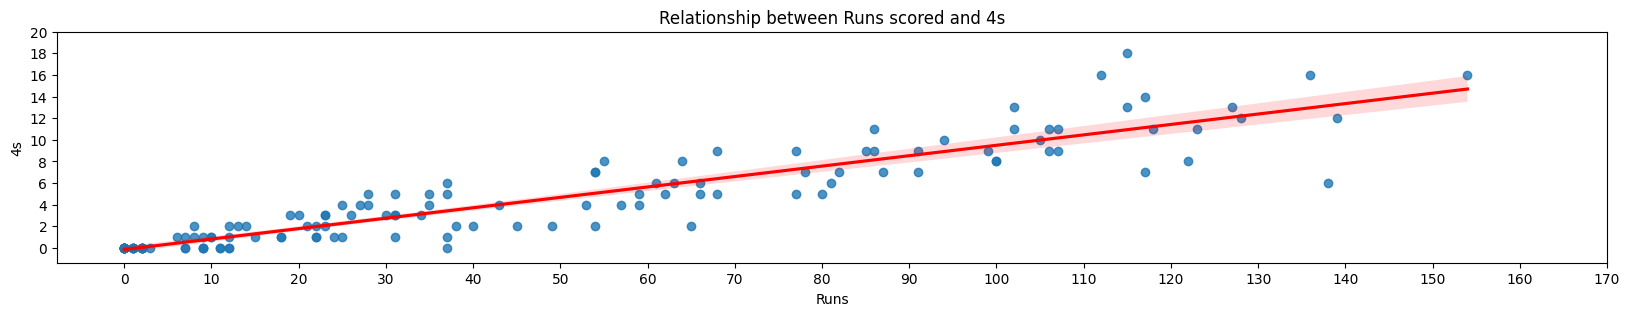

In [18]:
plt.figure(figsize=(20,3))
sns.regplot(x='Runs',y='4s',data=data,line_kws={'color':'red'})
plt.title("Relationship between Runs scored and 4s")
plt.xticks(np.arange(0,180,10))
plt.yticks(np.arange(0,22,2))
plt.show()

There is a linear relationship. It means that Virat Kohli likes playing fours. The more runs he scores in the innings, the more fours he plays. Let’s see if there is some relationship with the sixes:

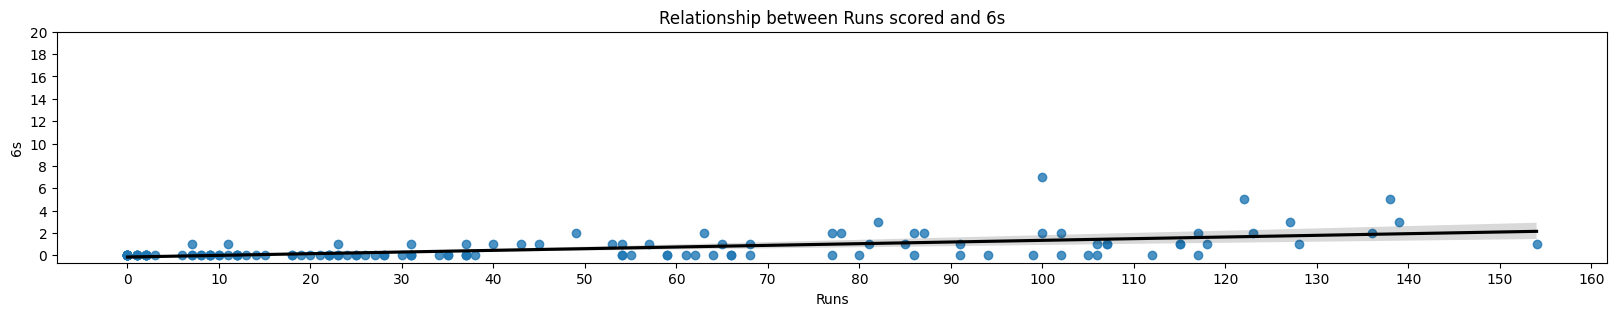

In [19]:
plt.figure(figsize=(20,3))
sns.regplot(x='Runs',y='6s',data=data,line_kws={'color':'black'})
plt.title("Relationship between Runs scored and 6s")
plt.xticks(np.arange(0,170,10))
plt.yticks(np.arange(0,22,2))
plt.show()

There is no strong linear relationship here. It means Virat Kohli likes playing fours more than sixes.

So this is how i analyze the performance of Virat Kohli.

**Summary**


So this is how you can perform Virat Kohli performance analysis using the Python programming language. Analyzing a player’s performance is one of the use cases of Data Science in sports analytics. I hope you liked this small project on Virat Kohli performance analysis using Python.